## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib as plt

In [4]:
cardio_df = pd.read_csv("cardio_train.csv", delimiter=';')
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Drop the non-beneficial ID column.
cardio_df = cardio_df.drop(['id'], axis=1)

In [6]:
cardio_df['age'] = cardio_df['age'] / 365.25

In [7]:
cardio_df = cardio_df[cardio_df['height'] >= 144 ]

In [8]:
cardio_df = cardio_df[cardio_df['weight'] >= 40 ]

In [9]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# Calculate IQR for 'ap_hi'
Q1_hi = cardio_df['ap_hi'].quantile(0.25)
Q3_hi = cardio_df['ap_hi'].quantile(0.75)
IQR_hi = Q3_hi - Q1_hi
lower_bound_hi = Q1_hi - 1.5 * IQR_hi
upper_bound_hi = Q3_hi + 1.5 * IQR_hi

# Calculate IQR for 'ap_lo'
Q1_lo = cardio_df['ap_lo'].quantile(0.25)
Q3_lo = cardio_df['ap_lo'].quantile(0.75)
IQR_lo = Q3_lo - Q1_lo
lower_bound_lo = Q1_lo - 1.5 * IQR_lo
upper_bound_lo = Q3_lo + 1.5 * IQR_lo

# Filter out outliers based on 'ap_hi' and 'ap_lo'
filtered_df = cardio_df[(cardio_df['ap_hi'].between(lower_bound_hi, upper_bound_hi)) & 
                        (cardio_df['ap_lo'].between(lower_bound_lo, upper_bound_lo))]

In [11]:
filtered_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
5,59.997262,1,151,67.0,120,80,2,2,0,0,0,0


In [12]:
filtered_df.mean()

age             53.362256
gender           1.352666
height         164.607775
weight          74.301302
ap_hi          126.622633
ap_lo           81.791023
cholesterol      1.364332
gluc             1.225611
smoke            0.087855
alco             0.053202
active           0.803467
cardio           0.498193
dtype: float64

In [13]:
filtered_df.count()

age            64208
gender         64208
height         64208
weight         64208
ap_hi          64208
ap_lo          64208
cholesterol    64208
gluc           64208
smoke          64208
alco           64208
active         64208
cardio         64208
dtype: int64

In [14]:
cardio_df = filtered_df.copy()

In [15]:
cardio_df = cardio_df.reset_index()

In [16]:
cardio_df = cardio_df.drop('index', axis=1)

In [17]:
cardio_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,59.997262,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64203,57.697467,1,165,80.0,150,80,1,1,0,0,1,1
64204,52.676249,2,168,76.0,120,80,1,1,1,0,1,0
64205,61.878166,1,158,126.0,140,90,2,2,0,0,1,1
64206,61.412731,1,163,72.0,135,80,1,2,0,0,0,1


In [18]:
# Split our preprocessed data into our features and target arrays
y = cardio_df['cardio'].values

X = cardio_df.drop('cardio', axis=1).values

In [19]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
y_train

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
X_train_scaled

array([[ 1.19880019, -0.74218842, -0.72843946, ..., -0.31062348,
        -0.23771872,  0.49401309],
       [ 0.03802777, -0.74218842,  1.59899142, ..., -0.31062348,
        -0.23771872, -2.02423784],
       [-0.52506687,  1.34736674, -0.08193088, ...,  3.21933162,
         4.20665229,  0.49401309],
       ...,
       [-1.45840439, -0.74218842, -0.2112326 , ...,  3.21933162,
        -0.23771872,  0.49401309],
       [ 0.49493188, -0.74218842,  0.17667255, ..., -0.31062348,
        -0.23771872,  0.49401309],
       [ 0.02378766, -0.74218842,  0.95248284, ..., -0.31062348,
        -0.23771872,  0.49401309]])

In [23]:
y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)

## Compile, Train and Evaluate the Model

In [24]:
#initiate sequential model
model = tf.keras.models.Sequential()

# input layer
model.add(tf.keras.layers.Dense(units=X.shape[1], activation='relu', input_shape=(11,)))

# additional layers
model.add(tf.keras.layers.Dense(units=30, activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation='relu'))
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation='relu'))
model.add(tf.keras.layers.Dense(units=30, activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              optimizer='adam', 
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train_one_hot, epochs=100, batch_size=64,
                    validation_data=(X_test_scaled, y_test_one_hot),
                    callbacks=[early_stopping])

Epoch 1/100
703/703 [==============================] - 3s 3ms/step - loss: 0.5758 - categorical_accuracy: 0.7084 - val_loss: 0.5580 - val_categorical_accuracy: 0.7262
Epoch 2/100
703/703 [==============================] - 2s 2ms/step - loss: 0.5587 - categorical_accuracy: 0.7233 - val_loss: 0.5543 - val_categorical_accuracy: 0.7271
Epoch 3/100
703/703 [==============================] - 2s 2ms/step - loss: 0.5560 - categorical_accuracy: 0.7257 - val_loss: 0.5540 - val_categorical_accuracy: 0.7250
Epoch 4/100
703/703 [==============================] - 2s 2ms/step - loss: 0.5535 - categorical_accuracy: 0.7266 - val_loss: 0.5519 - val_categorical_accuracy: 0.7290
Epoch 5/100
703/703 [==============================] - 2s 2ms/step - loss: 0.5521 - categorical_accuracy: 0.7272 - val_loss: 0.5509 - val_categorical_accuracy: 0.7287
Epoch 6/100
703/703 [==============================] - 2s 2ms/step - loss: 0.5507 - categorical_accuracy: 0.7268 - val_loss: 0.5510 - val_categorical_accuracy: 0.729

602/602 [==============================] - 1s 1ms/step
Confusion Matrix:
[[7337 2300]
 [2894 6732]]


<AxesSubplot:>

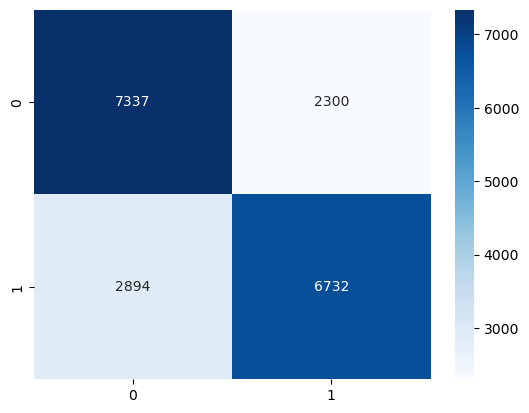

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test_scaled)
threshold = 0.5
y_pred_custom_threshold = (y_pred[:, 1] >= threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_custom_threshold)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

602/602 [==============================] - 1s 1ms/step
Confusion Matrix:
[[5474 4163]
 [1587 8039]]


<AxesSubplot:>

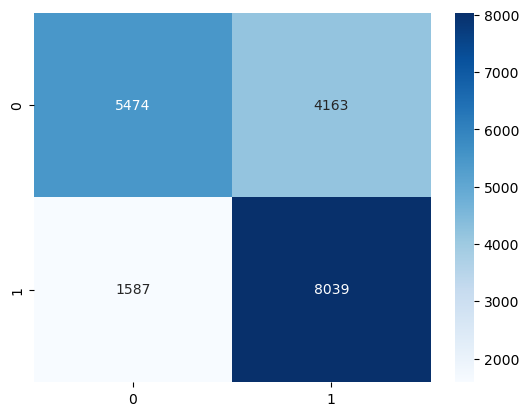

In [26]:
y_pred = model.predict(X_test_scaled)
threshold = 0.35 
y_pred_custom_threshold = (y_pred[:, 1] >= threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_custom_threshold)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

In [27]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

602/602 [==============================] - 1s 1ms/step - loss: 0.5489 - categorical_accuracy: 0.7304
Test Loss: 0.5489186644554138
Test Accuracy: 0.7303639054298401


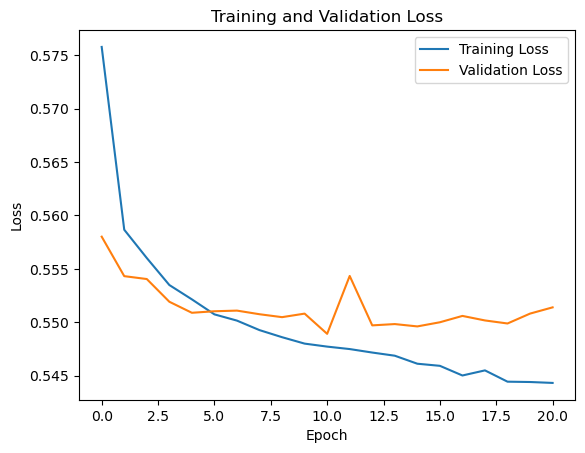

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

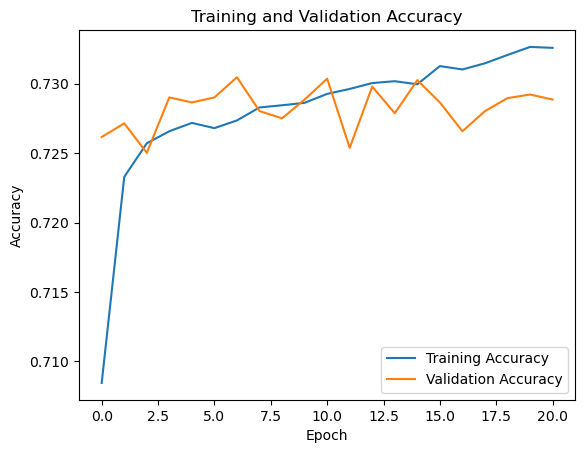

In [29]:
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
correlation_matrix = cardio_df.corr()

<AxesSubplot:>

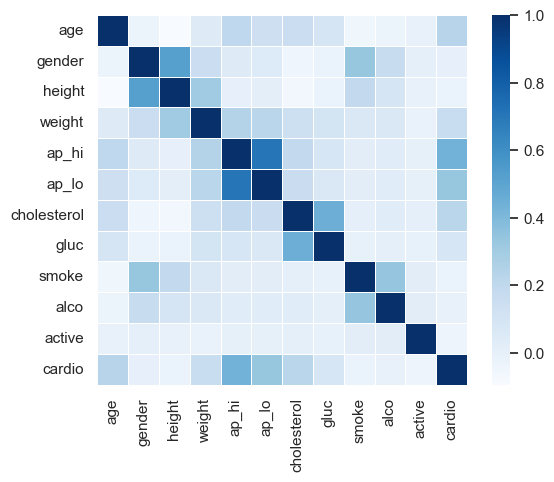

In [31]:
sns.set(style="dark") 

sns.heatmap(correlation_matrix, annot=False, cmap="Blues", fmt=".6f",
            linewidths=0.5, square=True)

In [32]:
y_pred_series = (y_pred[:, 1] >= threshold).astype(int)

In [34]:
fn_df = pd.DataFrame(X_test_scaled)

fn_df['ground_truth'] = y_test
fn_df['predictions'] = y_pred_series

fn = fn_df[(fn_df['predictions'] == 0) & (fn_df['ground_truth'] == 1)]

fn.head()

,0,1,2,3,4,5,6,7,8,9,10,ground_truth,predictions
3,0.078714,-0.742188,-0.857741,0.760251,-0.458300,-0.229851,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,1,0
23,0.059185,-0.742188,0.693879,-0.023797,-1.153951,-1.526710,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,1,0
52,-1.957215,-0.742188,-0.728439,0.118757,-1.849602,1.067008,0.929185,-0.395883,-0.310623,-0.237719,0.494013,1,0
65,-0.527915,-0.742188,-0.987043,-0.807846,-1.153951,-1.526710,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,1,0
68,-0.722801,-0.742188,-0.599138,-1.164232,-0.458300,-0.229851,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,1,0


In [35]:
fp_df = pd.DataFrame(X_test_scaled)

fp_df['ground_truth'] = y_test
fp_df['predictions'] = y_pred_series

fp = fp_df[(fp_df['predictions'] == 1) & (fp_df['ground_truth'] == 0)]

fp.head()

,0,1,2,3,4,5,6,7,8,9,10,ground_truth,predictions
4,1.097492,-0.742188,-0.599138,0.332588,0.237351,2.363867,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,0,1
7,-1.443757,1.347367,0.823181,0.831528,3.019955,2.493553,0.929185,1.343239,-0.310623,-0.237719,0.494013,0,1
9,1.302143,-0.742188,0.047371,-0.380183,0.237351,1.067008,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,0,1
12,0.087665,-0.742188,0.305974,-0.095075,2.880825,2.882610,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,0,1
15,0.624313,1.347367,0.305974,-0.380183,0.237351,-0.229851,2.395348,-0.395883,3.219332,4.206652,0.494013,0,1


In [36]:
tp_df = pd.DataFrame(X_test_scaled)

tp_df['ground_truth'] = y_test
tp_df['predictions'] = y_pred_series

tp = fp_df[(fp_df['predictions'] == 1) & (fp_df['ground_truth'] == 1)]

tp.head()

,0,1,2,3,4,5,6,7,8,9,10,ground_truth,predictions
0,1.534460,1.347367,-0.987043,0.403866,-0.458300,-0.229851,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,1,1
6,0.321203,-0.742188,-1.116345,1.045360,0.933002,1.067008,0.929185,-0.395883,-0.310623,-0.237719,0.494013,1,1
8,-0.526287,-0.742188,-0.599138,-0.308906,1.628653,1.067008,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,1,1
10,-2.051200,-0.742188,0.952483,6.533701,0.933002,1.067008,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,1,1
11,-0.247995,1.347367,0.693879,-0.665292,0.933002,1.067008,0.929185,-0.395883,-0.310623,-0.237719,0.494013,1,1


In [37]:
tn_df = pd.DataFrame(X_test_scaled)

tn_df['ground_truth'] = y_test
tn_df['predictions'] = y_pred_series

tn = tn_df[(tn_df['predictions'] == 0) & (tn_df['ground_truth'] == 0)]

tn.head()

,0,1,2,3,4,5,6,7,8,9,10,ground_truth,predictions
1,-0.229686,1.347367,0.952483,-0.023797,-0.458300,-0.229851,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,0,0
2,0.048199,-0.742188,-0.728439,0.403866,-1.153951,-1.526710,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,0,0
5,-1.152039,1.347367,0.693879,0.332588,-0.458300,-0.229851,-0.536979,-0.395883,3.219332,4.206652,0.494013,0,0
13,-0.202020,-0.742188,0.305974,0.974083,-0.458300,-0.229851,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,0,0
14,-2.041842,-0.742188,0.693879,-0.308906,-0.458300,-1.526710,-0.536979,-0.395883,-0.310623,-0.237719,0.494013,0,0


In [43]:
fn_corr = fn.corr()

<AxesSubplot:>

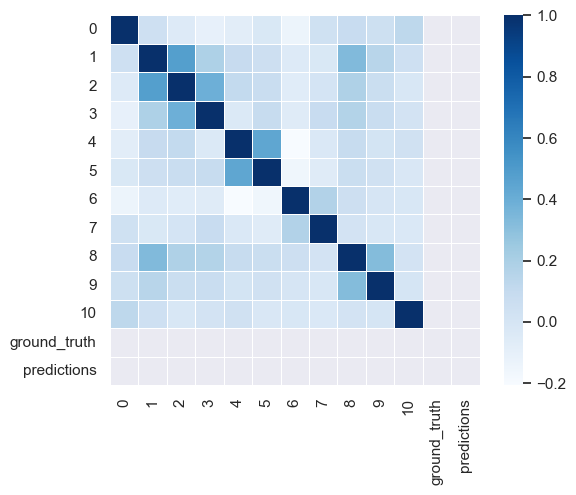

In [44]:
sns.heatmap(fn_corr, annot=False, cmap="Blues", fmt=".6f",
            linewidths=0.5, square=True)

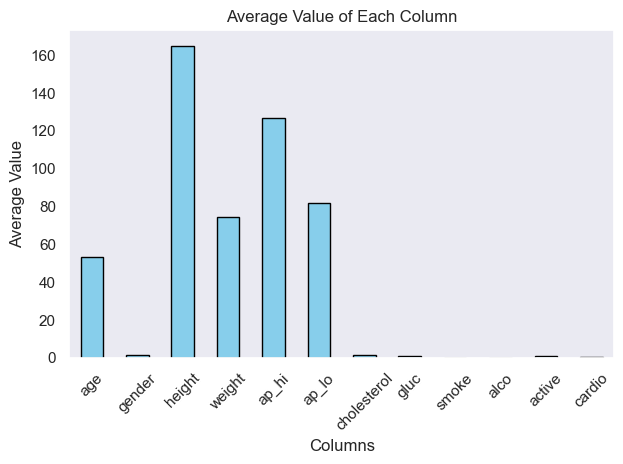

In [45]:
fn_i = fn.index

fn_df = cardio_df.loc[fn_i]

# Calculate the column-wise mean
fn_means = fn_df.mean()

# Create a bar chart
fn_means.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Average Value of Each Column')
plt.xlabel('Columns')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

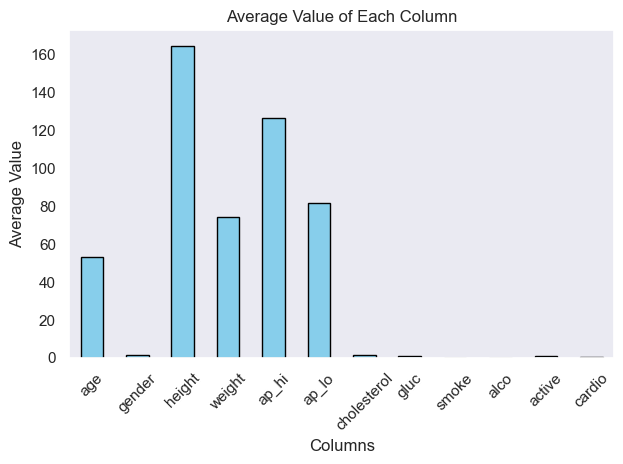

In [46]:
fp_i = fp.index

fp_df = cardio_df.loc[fp_i]

# Calculate the column-wise mean
fp_means = fp_df.mean()

# Create a bar chart
fp_means.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Average Value of Each Column')
plt.xlabel('Columns')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

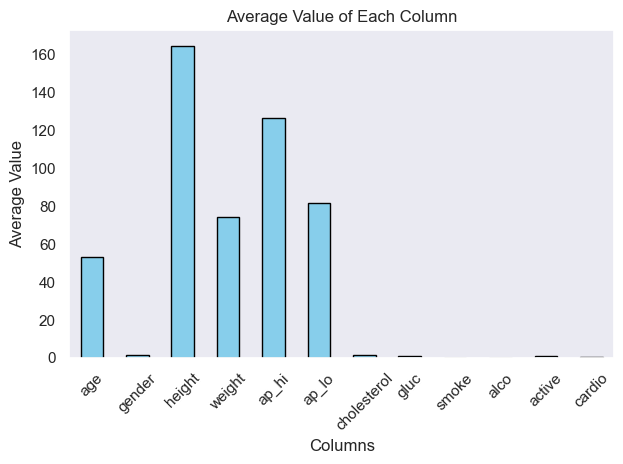

In [47]:
tn_i = tn.index

tn_df = cardio_df.loc[tn_i]

# Calculate the column-wise mean
tn_means = tn_df.mean()

# Create a bar chart
tn_means.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Average Value of Each Column')
plt.xlabel('Columns')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

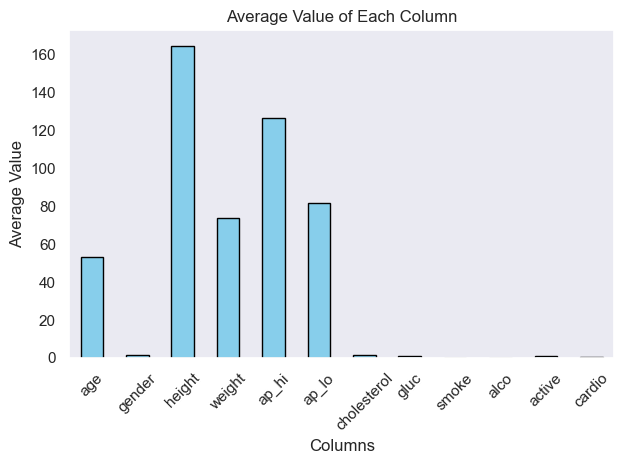

In [48]:
tp_i = tp.index

tp_df = cardio_df.loc[tp_i]

# Calculate the column-wise mean
tp_means = tp_df.mean()

# Create a bar chart
tp_means.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Average Value of Each Column')
plt.xlabel('Columns')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

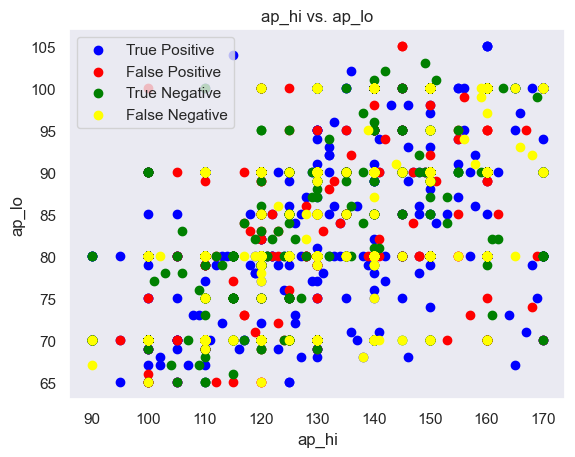

In [49]:
# Scatter plot
plt.scatter(tp_df['ap_hi'], tp_df['ap_lo'], color='blue', label='True Positive')
plt.scatter(fp_df['ap_hi'], fp_df['ap_lo'], color='red', label='False Positive')
plt.scatter(tn_df['ap_hi'], tn_df['ap_lo'], color='green', label='True Negative')
plt.scatter(fn_df['ap_hi'], fn_df['ap_lo'], color='yellow', label='False Negative')

# Adding labels, title, and legend
plt.xlabel('ap_hi')
plt.ylabel('ap_lo')
plt.title('ap_hi vs. ap_lo')
plt.legend()

# Display the plot
plt.show()

In [50]:
from pandas.plotting import parallel_coordinates

In [51]:
tp_df['class'] = 'TP'

In [52]:
fn_df['class'] = 'FN'

In [53]:
tn_df['class'] = 'TN'

In [54]:
merged_df = pd.concat([tp_df, fn_df], axis=0)

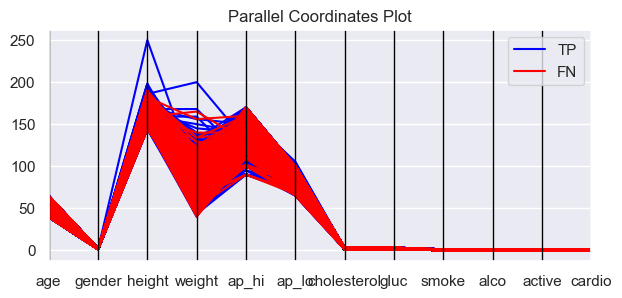

In [55]:
plt.figure(figsize=(7, 3))
parallel_coordinates(merged_df, 'class', color=['blue', 'red'])
plt.title("Parallel Coordinates Plot")
plt.show()


In [56]:
merged_df2 = pd.concat([tp_df, tn_df], axis=0)

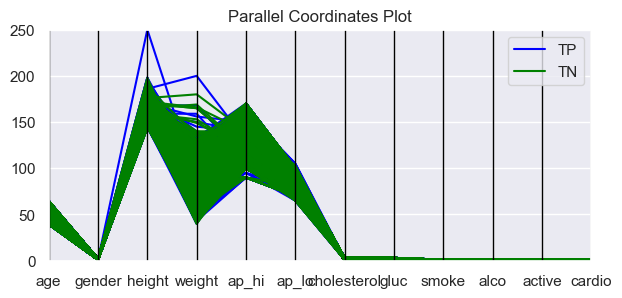

In [57]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Your plotting commands
plt.figure(figsize=(7, 3))
parallel_coordinates(merged_df2, 'class', color=['blue', 'green'])

# Set the y-axis limits
plt.ylim(0, 250)

plt.title("Parallel Coordinates Plot")
plt.show()
